[Reference1](https://towardsdatascience.com/an-end-to-end-data-science-project-that-will-boost-your-portfolio-c53cfe16f0e3)<br>
[Reference2](https://github.com/pbugnion/gmaps)

In [1]:
import gmaps
import gmaps.datasets

# gmaps.configure(api_key='AI...') # Fill in with your API key

earthquake_df = gmaps.datasets.load_dataset_as_df('earthquakes')
earthquake_df.head()

,latitude,longitude,magnitude
0,65.193300,-149.072500,1.70
1,38.791832,-122.780830,2.10
2,38.818001,-122.792168,0.48
3,33.601667,-116.727667,0.78
4,37.378334,-118.520836,3.64


In [2]:
locations = earthquake_df[['latitude', 'longitude']]
weights = earthquake_df['magnitude']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
import gmaps
import gmaps.datasets
# gmaps.configure(api_key="AI...") # Your Google API key

df = gmaps.datasets.load_dataset_as_df('starbucks_kfc_uk')

starbucks_df = df[df['chain_name'] == 'starbucks']
starbucks_df = starbucks_df[['latitude', 'longitude']]

starbucks_layer = gmaps.symbol_layer(
    starbucks_df, fill_color="green", stroke_color="green", scale=2
)
fig = gmaps.figure()
fig.add_layer(starbucks_layer)
fig

In [3]:
fig = gmaps.figure()
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
import pandas as pd
df = pd.read_json('amsterdam.json')

In [8]:
df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
2,1.0,2,1.0,1.0,2,2,4,1,$130.00,52.362016,4.866872,Entire home/apt,f
3,2.0,4,1.0,2.0,2,4,2,2,$110.00,52.365826,4.858178,Entire home/apt,f
4,1.0,2,1.0,1.0,1,3,10,1,$115.00,52.364179,4.864885,Entire home/apt,f


In [11]:
max(df['price'].values, key = len)

'$1,305.00'

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15181 entries, 0 to 15180
Data columns (total 13 columns):
host_listings_count               15178 non-null float64
accommodates                      15181 non-null int64
bathrooms                         15163 non-null float64
bedrooms                          15169 non-null float64
guests_included                   15181 non-null int64
minimum_nights                    15181 non-null int64
number_of_reviews                 15181 non-null int64
calculated_host_listings_count    15181 non-null int64
price                             15181 non-null object
latitude                          15181 non-null float64
longitude                         15181 non-null float64
room_type                         15181 non-null object
instant_bookable                  15181 non-null object
dtypes: float64(5), int64(5), object(3)
memory usage: 1.6+ MB


In [13]:
df['price'] = df['price'].apply(lambda x: x.replace('$', ''))
df['price'] = df['price'].apply(lambda x: x.replace(',', ''))

df['price'] = pd.to_numeric(df['price'])

In [14]:
fig = gmaps.Map(layout={'width': '1000px', 'height': '500px', 'padding': '10px'})

fig.add_layer(gmaps.heatmap_layer(df[['latitude', 'longitude']],
 weights=df['price']))
fig

Map(configuration={'api_key': None}, data_bounds=[(52.33387821596733, 4.819224643627479), (52.39682818292789, …

The map shows that locations in the city centre are more expensive, while the outskirts are cheaper (a pattern that probably does not only exists in Amsterdam). In addition, the city centre seems to have its own pattern.

In order to capture some geographical pattern we need to apply some feature engineering, a nice approach is to find a list of point of interest (POI) and calculate the distance between each observation and the POI.

To calculate the distance in KM I am using a function that retrieves the haversine distance, AKA the distance between two points on a sphere.

This kind of metrics has its own pros and cons: it gives an easy way to calculate the distance between two points, but it does not take into account obstacles such as building, lakes, rivers, borders and so on.

In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [ ]:
# fig.add_layer(gmaps.symbol_layer([tuple(x) for x in poi.to_numpy()]
#  , fill_color='green', stroke_color='green'))
# fig

In [19]:
df = pd.get_dummies(df)
df.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,1,0,0,1,0
2,1.0,2,1.0,1.0,2,2,4,1,130.0,52.362016,4.866872,1,0,0,1,0
3,2.0,4,1.0,2.0,2,4,2,2,110.0,52.365826,4.858178,1,0,0,1,0
4,1.0,2,1.0,1.0,1,3,10,1,115.0,52.364179,4.864885,1,0,0,1,0


In [25]:
df.shape

(15181, 16)

In [28]:
df = df.dropna()

In [29]:
X = df.drop(['price'], axis=1)
y = df['price']

In [53]:
import joblib

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [32]:
from sklearn import metrics
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

scores = pd.DataFrame({'Baseline (regression)' : [r2, mae]}, index=['R2', 'MAE'])
scores

,Baseline (regression)
R2,0.344806
MAE,39.819680


In [54]:
import os
from sklearn.model_selection import GridSearchCV

if 'svr_gridsearch_cv.pkl' in os.listdir():
    
    svr_grid_search = joblib.load('svr_gridsearch_cv.pkl')
    
else:
    
    from sklearn.svm import SVR
    
    svr = SVR()
    param_grid = [
      {'C': [1, 10, 100], 'kernel': ['linear']},
      {'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}]
    
    svr_grid_search = GridSearchCV(svr, param_grid=param_grid, 
                                   n_jobs=-1, 
                                   scoring=['r2', 'neg_mean_squared_error'],
                                  refit='neg_mean_squared_error', verbose=100)
    
    svr_grid_search.fit(X_train, y_train)
    
    joblib.dump(svr_grid_search.best_estimator_, 'svr_gridsearch_cv.pkl')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.

In [52]:
if 'gbm_gridsearch_cv.pkl' in os.listdir():
    
    gbm_grid_search = joblib.load('gbm_gridsearch_cv.pkl')
    
else:
    
    from lightgbm import LGBMRegressor
    
    gbm = LGBMRegressor()
    
    param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 150],
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [15, 31, 50]}
    
    gbm_grid_search = GridSearchCV(gbm, param_grid=param_grid, 
                                   n_jobs=-1, 
                                   scoring=['r2', 'neg_mean_squared_error'],
                                  refit='neg_mean_squared_error', verbose=100)
    
    gbm_grid_search.fit(X_train, y_train)
    
    joblib.dump(gbm_grid_search.best_estimator_, 'gbm_gridsearch_cv.pkl')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


/Users/kang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.2s
[Paralle

[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   28.7s
[Paralle

In [47]:
def build_model():
    model = keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(25,)), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mean_squared_error',
    optimizer=optimizer,
    metrics=['mae', r2_keras])
    return model

In [50]:
coefficients = pd.concat([pd.DataFrame(X.columns, columns=['variable']), 

pd.DataFrame(np.transpose(lin_reg.coef_), columns=['coefficients'])], axis = 1)

coefficients

,variable,coefficients
0,host_listings_count,0.036872
1,accommodates,20.838994
2,bathrooms,28.571897
3,bedrooms,14.887248
4,guests_included,3.189429
5,minimum_nights,-0.061590
6,number_of_reviews,-0.023491
7,calculated_host_listings_count,0.634992
8,latitude,79.392681
9,longitude,-78.660081


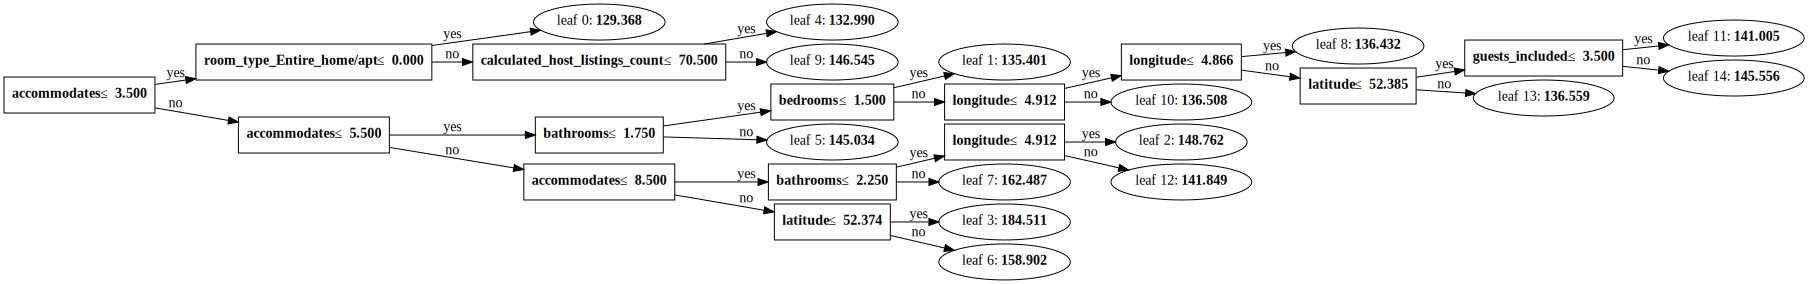

In [51]:
import lightgbm

lightgbm.create_tree_digraph(gbm_grid_search.best_estimator_)